In [6]:
import pandas as pd
from matplotlib import pyplot as plt
 
# Read CSV into pandas
data = pd.read_csv(r"Downloads/AWS_Honeypot_marx-geo.csv")
print(data.head())
df = pd.DataFrame(data)


       datetime               host         src proto  type      spt     dpt  \
0  3/3/13 21:53     groucho-oregon  1032051418   TCP   NaN   6000.0  1433.0   
1  3/3/13 21:57     groucho-oregon  1347834426   UDP   NaN   5270.0  5060.0   
2  3/3/13 21:58     groucho-oregon  2947856490   TCP   NaN   2489.0  1080.0   
3  3/3/13 21:58    groucho-us-east   841842716   UDP   NaN  43235.0  1900.0   
4  3/3/13 21:58  groucho-singapore  3587648279   TCP   NaN  56577.0    80.0   

            srcstr  cc        country         locale localeabbr postalcode  \
0   61.131.218.218  CN          China  Jiangxi Sheng         36        NaN   
1      80.86.82.58  DE        Germany            NaN        NaN        NaN   
2  175.180.184.106  TW         Taiwan         Taipei        NaN        NaN   
3     50.45.128.28  US  United States         Oregon         OR      97124   
4    213.215.43.23  FR         France            NaN        NaN        NaN   

   latitude  longitude  Unnamed: 15  
0   28.5500   115.

In [7]:
# value_counts() counts the number of values in a column.
# print(data['country'].value_counts())
print(df['country'].value_counts().rename_axis('Countries').reset_index(name='Counts'))

df2 = pd.DataFrame(df['country'].value_counts().rename_axis('Countries').reset_index(name='Counts'))

df2.head()

         Countries  Counts
0            China  191394
1    United States   89982
2            Japan   17204
3             Iran   13042
4           Taiwan   12148
..             ...     ...
172        Andorra       2
173        Bermuda       1
174       Barbados       1
175        Namibia       1
176     Cape Verde       1

[177 rows x 2 columns]


,Countries,Counts
0,China,191394
1,United States,89982
2,Japan,17204
3,Iran,13042
4,Taiwan,12148


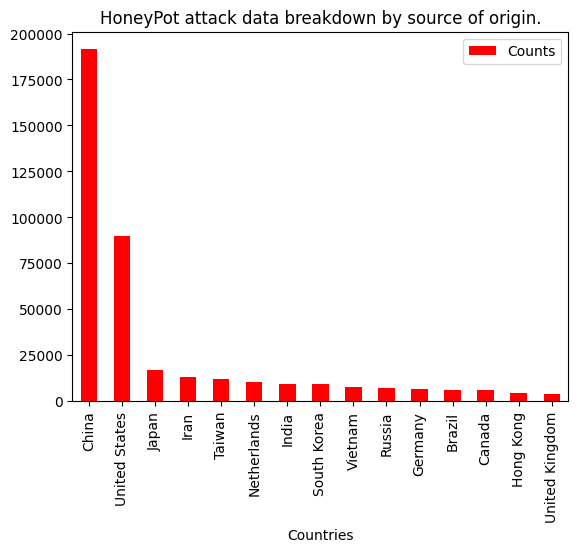

In [15]:
# bar plot
df2.head(15).plot(kind = 'bar',
        x = 'Countries',
        y = 'Counts',
        color = 'red')
  
# set the title
plt.title('HoneyPot attack data breakdown by source of origin.')
  
# show the plot
plt.show()

TCP     327991
UDP      78779
ICMP     44811
Name: proto, dtype: int64


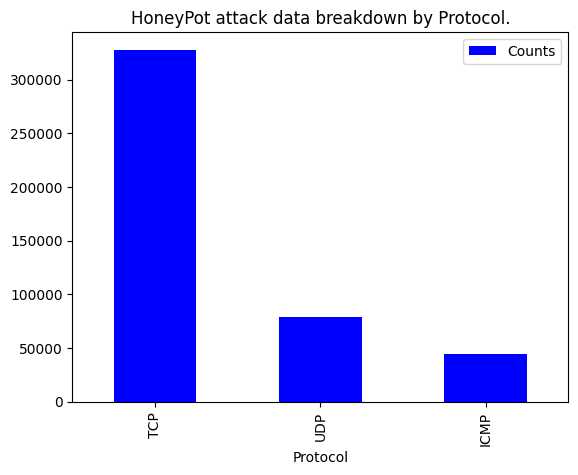

In [5]:
print(df['proto'].value_counts())

df3 = pd.DataFrame(df['proto'].value_counts().rename_axis('Protocol').reset_index(name='Counts'))

df3.head()

# bar plot
df3.head(15).plot(kind = 'bar',
        x = 'Protocol',
        y = 'Counts',
        color = 'blue')
  
# set the title
plt.title('HoneyPot attack data breakdown by Protocol.')
  
# show the plot
plt.show()

6000.0     154133
25416.0     18195
10100.0     11116
4445.0       4716
43825.0      2884
            ...  
21161.0         1
17316.0         1
24968.0         1
516.0           1
59139.0         1
Name: spt, Length: 46188, dtype: int64


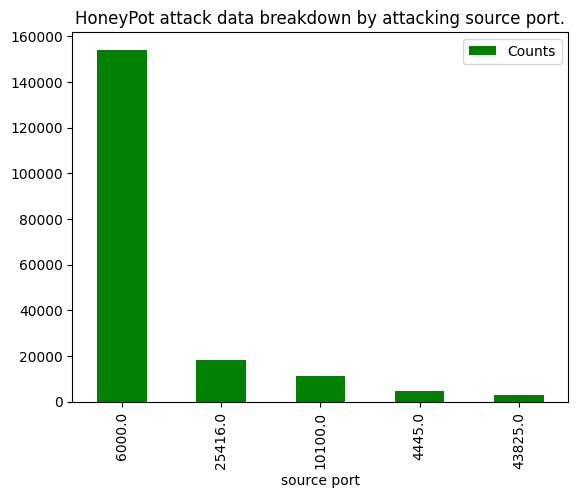

In [11]:
print(df['spt'].value_counts())

df4 = pd.DataFrame(df['spt'].value_counts().rename_axis('source port').reset_index(name='Counts'))

df4.head()

# bar plot
df4.head(5).plot(kind = 'bar',
        x = 'source port',
        y = 'Counts',
        color = 'green')
  
# set the title
plt.title('HoneyPot attack data breakdown by attacking source port.')
  
# show the plot
plt.show()

1433.0     109425
445.0       40611
3389.0      30077
80.0        19575
56338.0     18196
            ...  
825.0           1
1505.0          1
1557.0          1
1578.0          1
29142.0         1
Name: dpt, Length: 4041, dtype: int64


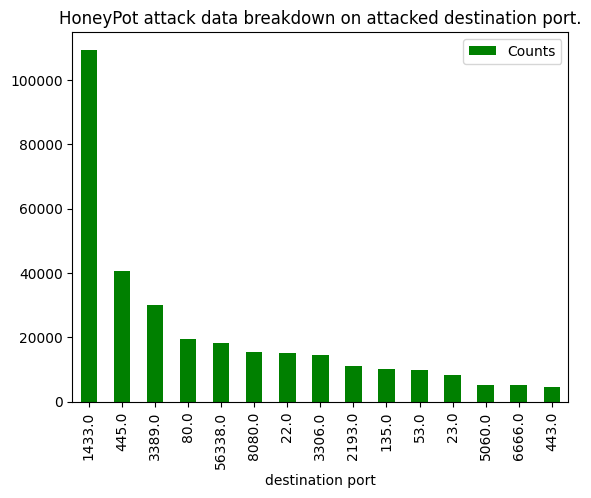

In [13]:
print(df['dpt'].value_counts())

df5 = pd.DataFrame(df['dpt'].value_counts().rename_axis('destination port').reset_index(name='Counts'))

df5.head()

# bar plot
df5.head(15).plot(kind = 'bar',
        x = 'destination port',
        y = 'Counts',
        color = 'green')
  
# set the title
plt.title('HoneyPot attack data breakdown on attacked destination port.')
  
# show the plot
plt.show()

           Countries  Counts
0      groucho-tokyo  126189
1     groucho-oregon   94076
2  groucho-singapore   78151
3    groucho-us-east   31779
4     groucho-norcal   24566
5     groucho-sydney   24456
6         groucho-sa   24316
7       zeppo-norcal   24094
8         groucho-eu   23954


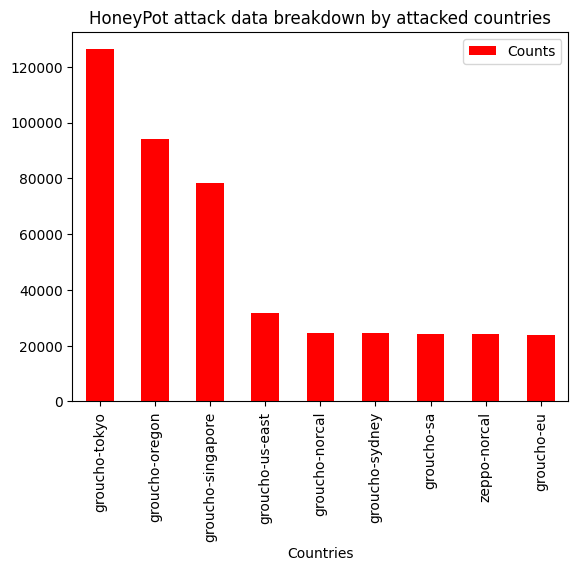

In [19]:
# value_counts() counts the number of values in a column.
# print(data['country'].value_counts())
print(df['host'].value_counts().rename_axis('Countries').reset_index(name='Counts'))

df6 = pd.DataFrame(df['host'].value_counts().rename_axis('Countries').reset_index(name='Counts'))

df6.head()
# bar plot
df6.head(10).plot(kind = 'bar',
        x = 'Countries',
        y = 'Counts',
        color = 'red')
  
# set the title
plt.title('HoneyPot attack data breakdown by attacked countries')
  
# show the plot
plt.show()

In [22]:
print(df['host'].value_counts() )

groucho-tokyo        126189
groucho-oregon        94076
groucho-singapore     78151
groucho-us-east       31779
groucho-norcal        24566
groucho-sydney        24456
groucho-sa            24316
zeppo-norcal          24094
groucho-eu            23954
Name: host, dtype: int64


In [24]:
df.groupby("country").filter(lambda x: (x["spt"]>0).any()).groupby("country").count()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
country,,,,,,,,,,,,,,,
Afghanistan,7,7,7,7,0,7,7,7,7,2,2,0,7,7,0
Albania,104,104,104,104,2,102,102,104,104,10,10,0,104,104,0
Algeria,80,80,80,80,10,70,70,80,80,57,57,0,80,80,0
Andorra,2,2,2,2,0,2,2,2,2,2,2,0,2,2,0
Angola,7,7,7,7,0,7,7,7,7,6,6,0,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1603,1603,1603,1603,135,1468,1468,1603,1603,119,119,0,1603,1603,0
Vietnam,7826,7826,7826,7826,172,7654,7654,7826,7826,1461,1461,0,7826,7826,0
Yemen,2,2,2,2,0,2,2,2,2,0,0,0,2,2,0


In [43]:
print(len(df[(df['country']=='Nepal') & (df['dpt']==8080)]))

1


In [45]:
subsetDataFrame = df[df['country'] == 'Nepal']
subsetDataFrame

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
1689,3/4/13 23:42,groucho-oregon,3393605405,TCP,NaN,57604.0,1433.0,202.70.79.29,NP,Nepal,Bagmati Zone,BA,NaN,27.7167,85.3167,NaN
190573,6/2/13 7:15,groucho-us-east,3059570307,TCP,NaN,41047.0,8080.0,182.93.86.131,NP,Nepal,Bagmati Zone,BA,NaN,27.7167,85.3167,NaN
246569,6/28/13 8:16,groucho-tokyo,3394183232,TCP,NaN,4034.0,445.0,202.79.32.64,NP,Nepal,NaN,NaN,NaN,28.0000,84.0000,NaN
246570,6/28/13 8:16,groucho-tokyo,3394183232,TCP,NaN,4034.0,445.0,202.79.32.64,NP,Nepal,NaN,NaN,NaN,28.0000,84.0000,NaN
286095,7/14/13 19:02,groucho-tokyo,1847728634,TCP,NaN,4571.0,445.0,110.34.25.250,NP,Nepal,NaN,NaN,NaN,28.0000,84.0000,NaN
286097,7/14/13 19:02,groucho-tokyo,1847728634,TCP,NaN,4571.0,445.0,110.34.25.250,NP,Nepal,NaN,NaN,NaN,28.0000,84.0000,NaN
450621,9/7/13 21:03,groucho-tokyo,1847728634,TCP,NaN,3304.0,445.0,110.34.25.250,NP,Nepal,NaN,NaN,NaN,28.0000,84.0000,NaN
450622,9/7/13 21:03,groucho-tokyo,1847728634,TCP,NaN,3304.0,445.0,110.34.25.250,NP,Nepal,NaN,NaN,NaN,28.0000,84.0000,NaN


In [51]:
subsetDataFrame = df[(df['country']=='China') & (df['spt']==6000)]
subsetDataFrame

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
6,3/3/13 21:59,groucho-oregon,3730416887,TCP,NaN,6000.0,1433.0,222.89.164.247,CN,China,Henan Sheng,41,NaN,34.6836,113.5325,NaN
7,3/3/13 22:07,groucho-singapore,3738622573,TCP,NaN,6000.0,3306.0,222.214.218.109,CN,China,Sichuan Sheng,51,NaN,30.6667,104.0667,NaN
8,3/3/13 22:12,groucho-oregon,3683919430,TCP,NaN,6000.0,1433.0,219.148.38.70,CN,China,Hebei,13,NaN,39.8897,115.2750,NaN
9,3/3/13 22:14,groucho-singapore,1007884304,TCP,NaN,6000.0,1433.0,60.19.24.16,CN,China,Liaoning,21,NaN,41.7922,123.4328,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451561,9/8/13 5:46,groucho-oregon,2102248748,TCP,NaN,6000.0,1433.0,125.77.197.44,CN,China,Fujian,35,NaN,26.0614,119.3061,NaN
451565,9/8/13 5:42,groucho-eu,1017974360,TCP,NaN,6000.0,8090.0,60.173.14.88,CN,China,Anhui Sheng,34,NaN,31.8639,117.2808,NaN
451568,9/8/13 5:49,groucho-oregon,2006148630,TCP,NaN,6000.0,1433.0,119.147.102.22,CN,China,Guangdong,44,NaN,23.1167,113.2500,NaN
451573,9/8/13 5:53,groucho-oregon,1919238521,TCP,NaN,6000.0,1433.0,114.101.65.121,CN,China,Anhui Sheng,34,NaN,31.8639,117.2808,NaN


In [73]:
#splitting the datetime value by removing the time values to later group by month
df['date'] = df['datetime'].str.split(' ').str[0]
#changing the values to pandas readable datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [76]:
df.groupby(df.date.dt.month)['country'].value_counts()

date  country                 
3     China                       21982
      United States               11162
      Japan                        1886
      Taiwan                       1705
      South Korea                  1637
                                  ...  
9     Luxembourg                      1
      Malta                           1
      Mauritius                       1
      Northern Mariana Islands        1
      Slovenia                        1
Name: country, Length: 914, dtype: int64

     date        country  Counts
1       3  United States   11162
130     4  United States   11895
259     5  United States   14897
395     6  United States   14700
537     7  United States   16614
673     8  United States   16362
808     9  United States    4352


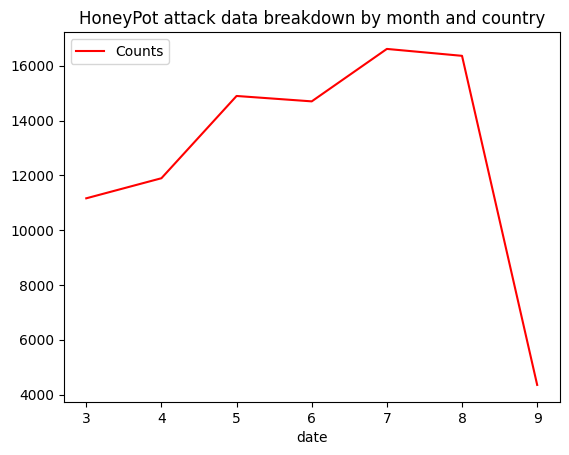

In [112]:
# grouping counts of countries based on their month value
df2 = df.groupby(df.date.dt.month)['country'].value_counts().reset_index(name='Counts')

country = "United States"
df_new = df2[df2['country'] == country]
print(df_new)

# bar plot
df_new.head(15).plot(kind = 'line',
        x = 'date',
        y = 'Counts',
        color = 'red')
  
# set the title
plt.title('HoneyPot attack data breakdown by month and country')
  
# show the plot
plt.show()